In [1]:
import lzma
from pathlib import Path

In [2]:
import dill as pickle
import numpy as np
from corner import corner
from matplotlib import pyplot as plt

In [3]:
import elm

Using database version X4-2024-12-31 located in: /mnt/home/beyerkyl/x4db/unpack_exfor-2024/X4-2024-12-31


In [4]:
with open("../prior/prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = prior.rvs(100000)

In [5]:
with lzma.open("../calibration/walker.xz") as f:
    walker = pickle.load(f)

In [6]:
results = np.load("../../t2/og_cal/result.npz")

In [7]:
n_chains, n_steps, n_params = results["model_chains"].shape
(n_chains, n_steps, n_params)

(64, 10000, 14)

In [8]:
chains = results["model_chains"]

In [9]:
logp = results["log_likelihoods"]

## Chains

Text(0.5, 0, '$i$')

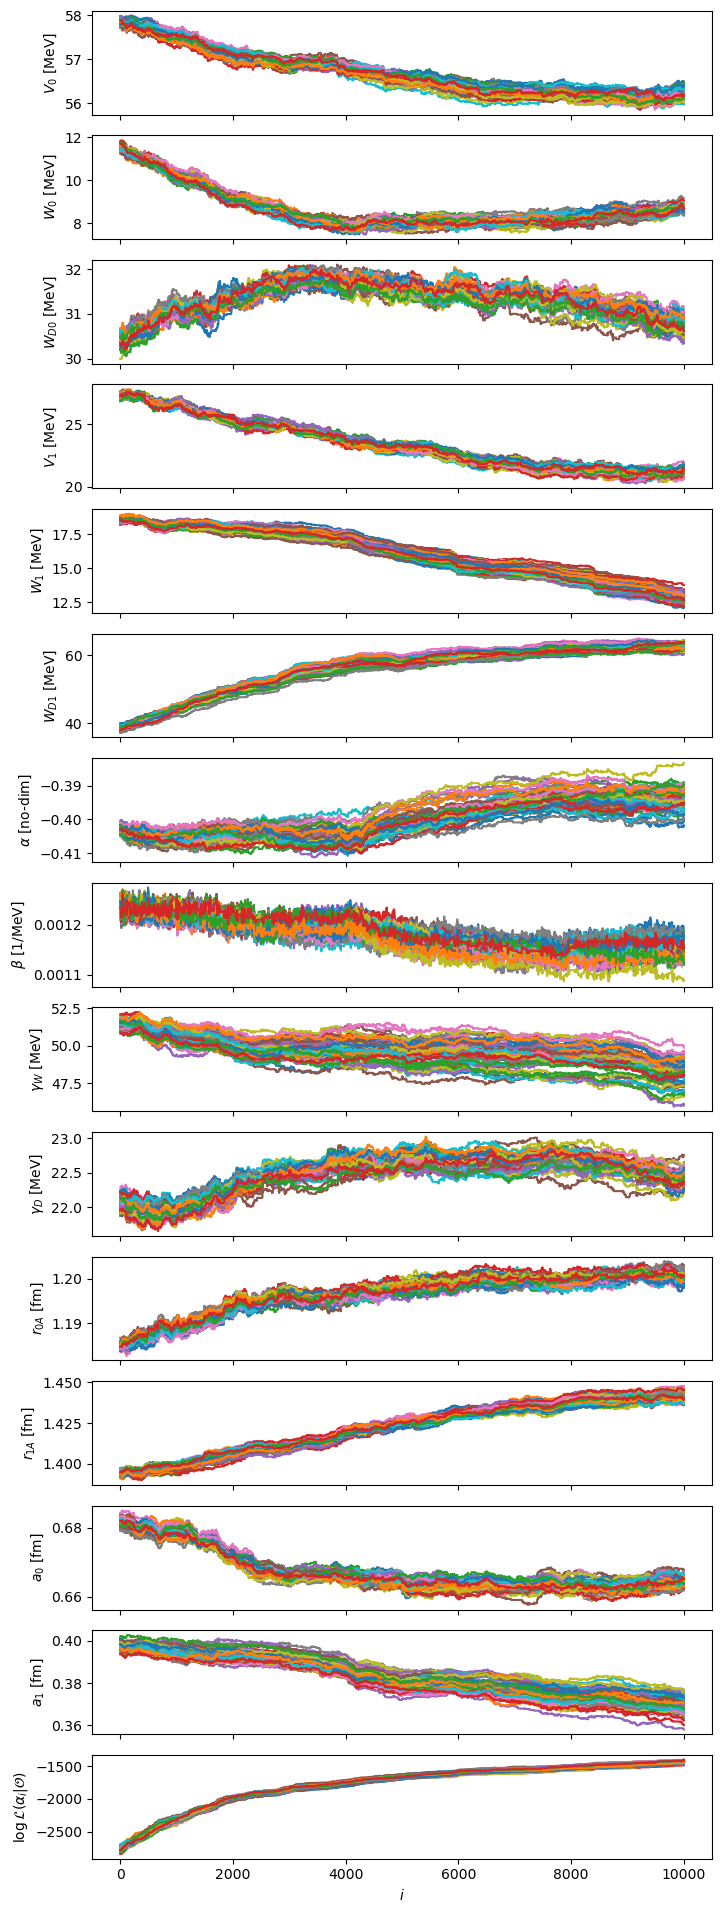

In [10]:
fig, axes = plt.subplots(chains.shape[2] + 1, 1, figsize=(8, 24), sharex=True)
for i in range(chains.shape[2]):
    for chain in range(chains.shape[0]):
        axes[i].plot(chains[chain, :, i])
        axes[i].set_ylabel(f"${elm.params[i].latex_name}$ [{elm.params[i].unit}]")


for chain in range(chains.shape[0]):
    axes[-1].plot(logp[chain, ...], label=f"{chain}")
    axes[-1].set_ylabel(r"$\log{\mathcal{L}(\alpha_i | \mathcal{O})}$")

axes[-1].set_xlabel(r"$i$")

## Corner plot

In [11]:
steps_to_burn = 8000

In [12]:
x = results["model_chains"][:,steps_to_burn:,:].reshape((n_chains*(n_steps - steps_to_burn), n_params))

In [13]:
idxs = np.random.choice( np.arange(n_chains*(n_steps - steps_to_burn)), 10000)
x = x[idxs,:]

In [14]:
x0 = np.mean(x, axis=0)
std = np.std(x, axis=0)
for p, m,s in zip(elm.params, x0, std):
    print(f"{p.name:10} {m:1.2f} +/- {s:1.6f} {p.unit}")

V0         56.16 +/- 0.110489 MeV
W0         8.43 +/- 0.210486 MeV
Wd0        31.05 +/- 0.211686 MeV
V1         21.18 +/- 0.313613 MeV
W1         13.61 +/- 0.534125 MeV
Wd1        62.37 +/- 0.979651 MeV
alpha      -0.39 +/- 0.002862 no-dim
beta       0.00 +/- 0.000017 1/MeV
gamma_w    48.90 +/- 0.840212 MeV
gamma_d    22.55 +/- 0.125681 MeV
r0A        1.20 +/- 0.001091 fm
r1A        1.44 +/- 0.002491 fm
a0         0.66 +/- 0.001591 fm
a1         0.37 +/- 0.003966 fm


In [23]:
labels = [f"${p.latex_name}$" for p in elm.params]

In [24]:
ranges = [ (m-3*s,m+3*s) for m,s in zip(x0,std)]

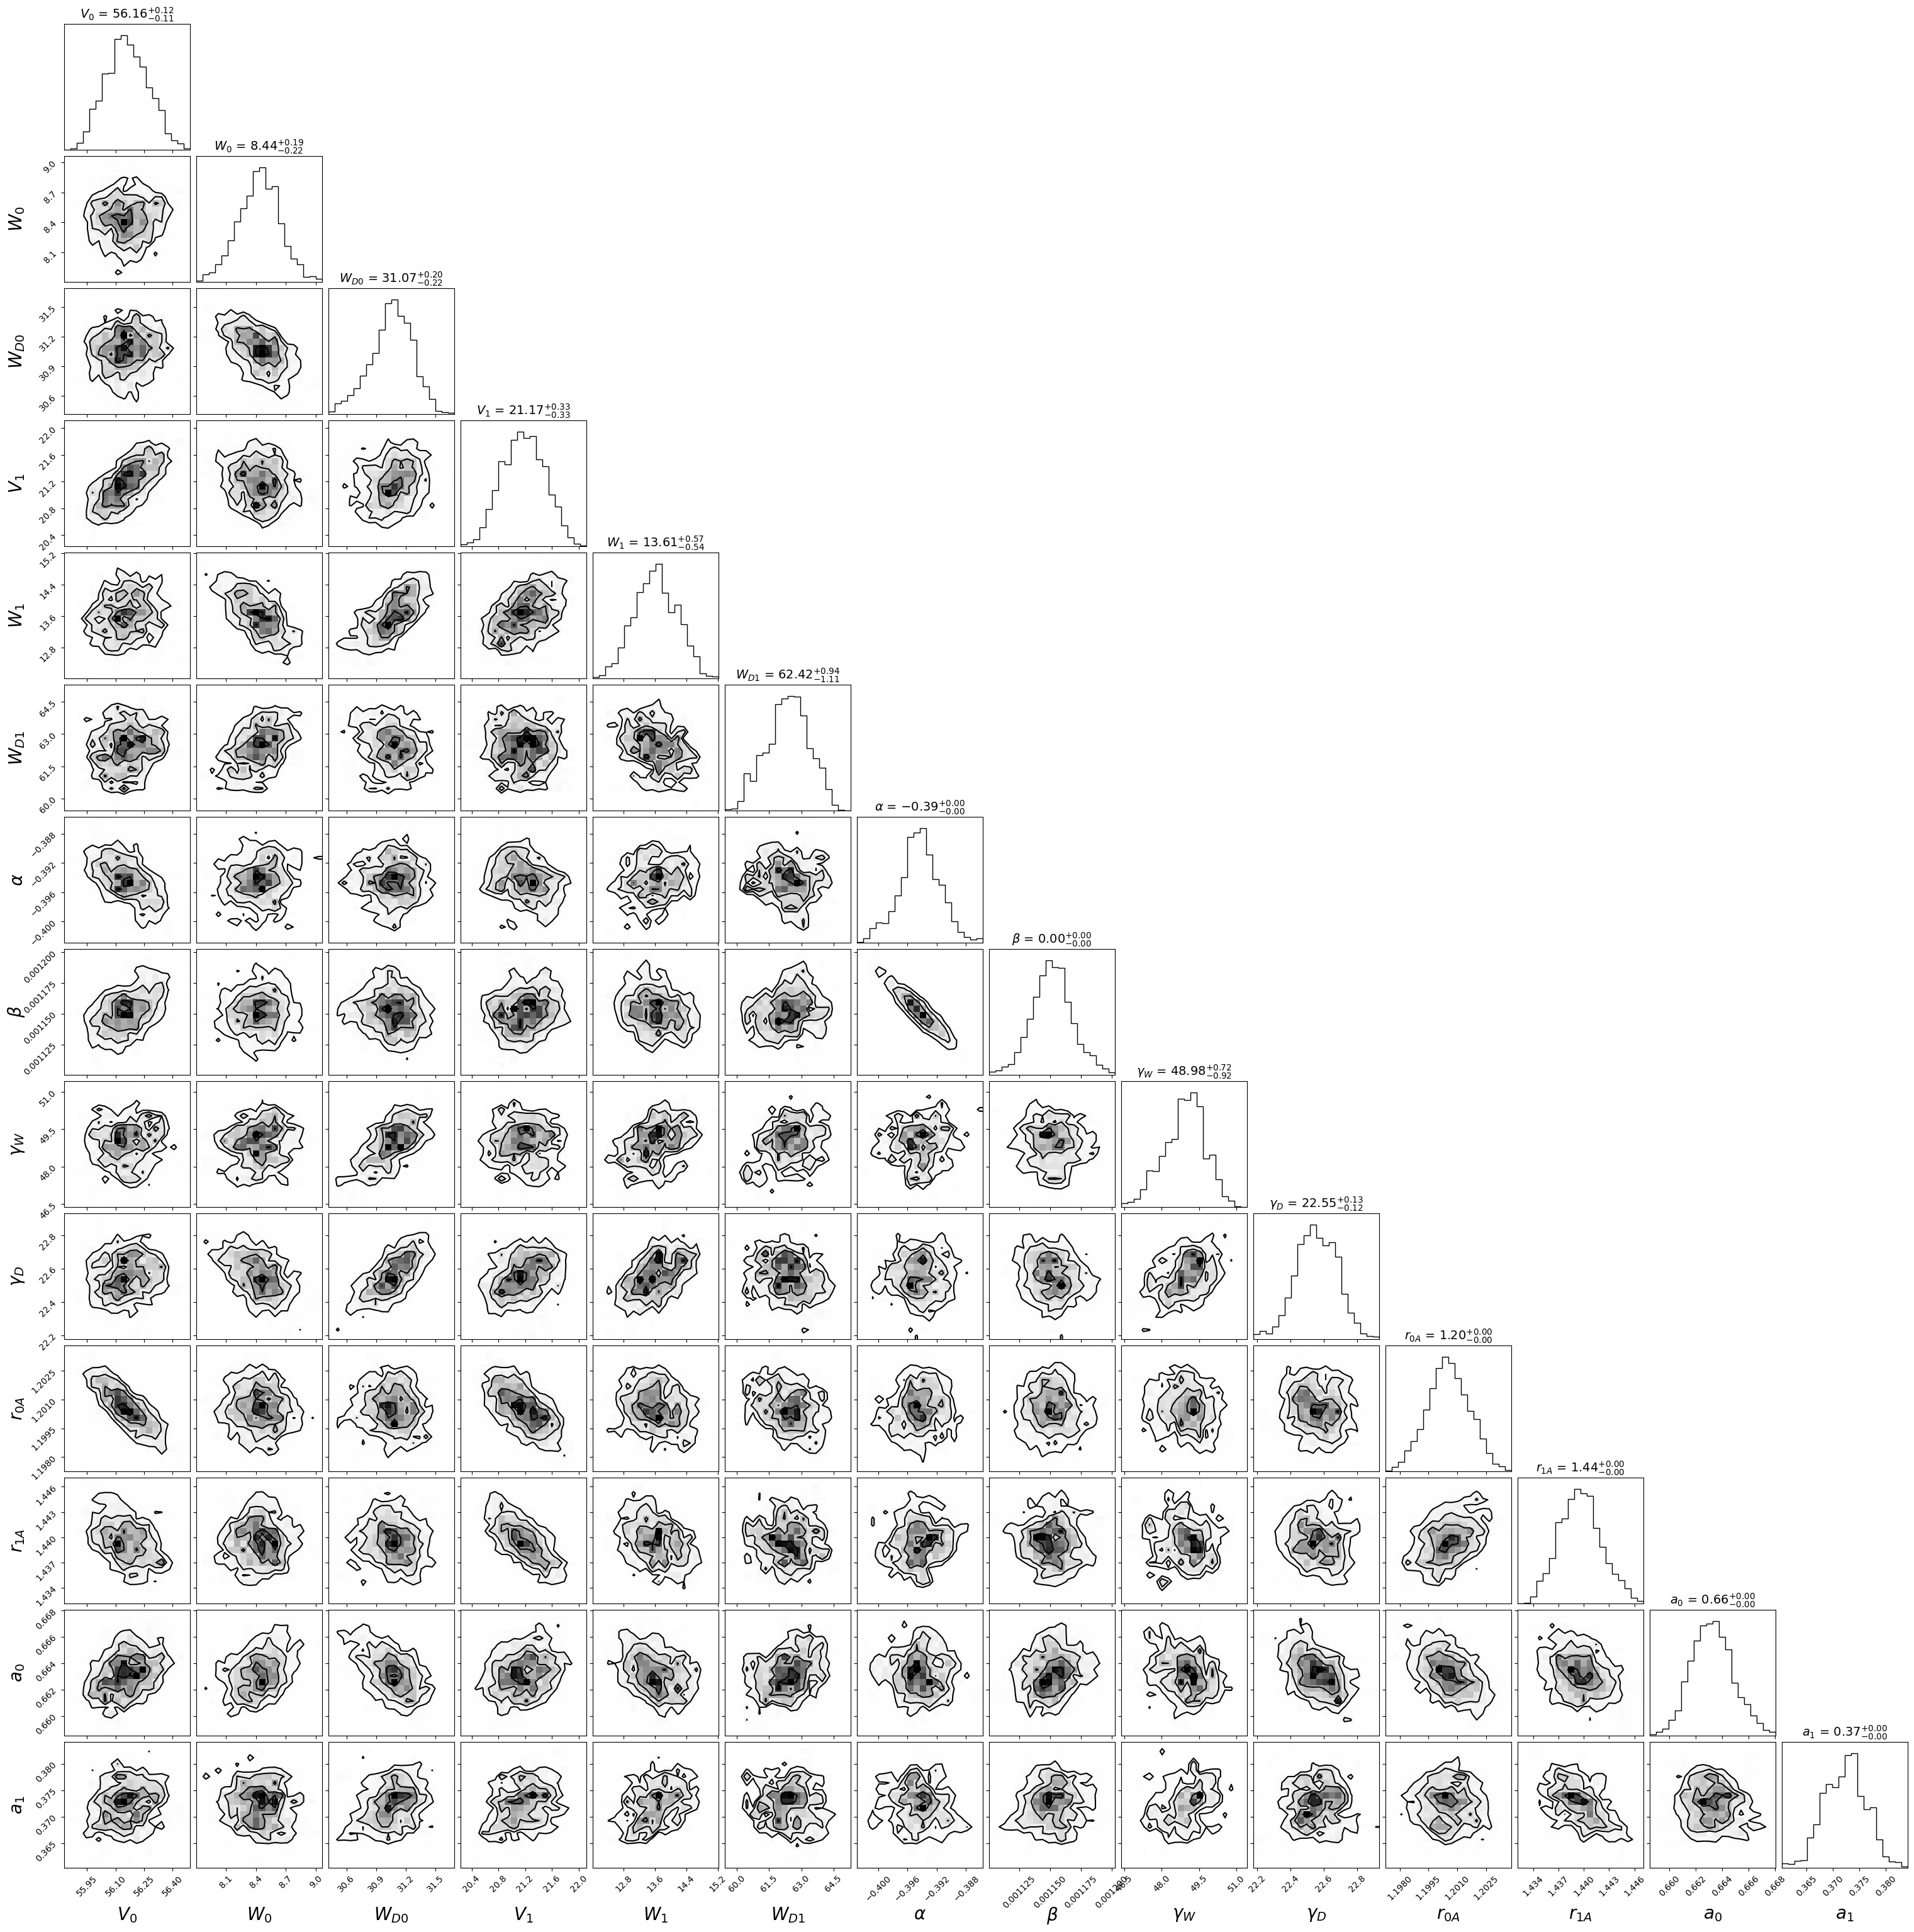

In [25]:
fig = corner(
    x,
    labels=labels,
    show_titles=True,
    title_kwargs={"fontsize": 14},
    label_kwargs={"fontsize": 20, "labelpad": 50},
    plot_density=True,
    plot_datapoints=False,
    range=ranges,
)